In [1]:
# --- 1. Initial Load & Overview ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re

pd.set_option('display.max_columns', 100)

In [2]:
# Load data
df = pd.read_csv("/workspaces/adorie-data-projects/scm-co-smart-project/data/raw/DataCoSupplyChainDataset.csv", encoding='latin-1')

In [3]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Shape: (180519, 53)
Columns: ['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Stat

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
# Rename columns
def rename_column(name):
    name = name.lower()
    name = re.sub(r"[^a-zA-Z0-9]+", "_", name)
    name = re.sub(r"_+", "_", name)
    name = name.strip("_")
    return name

In [5]:
df.columns = [rename_column(col) for col in df.columns]
df.rename(columns={'order_date_dateorders': 'order_date', 'shipping_date_dateorders': 'shipping_date'}, inplace=True)

In [6]:
# --- 3. Data Types & Format ---
date_cols = ['order_date', 'shipping_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [7]:
# Consistency Checks
# Order date <= shipping date?
inconsistent_dates = (df['order_date'] > df['shipping_date']).sum()
print(f"Inconsistent order vs shipping date: {inconsistent_dates}")

Inconsistent order vs shipping date: 0


In [8]:
# Categorical Cleaning
cat_cols = ['customer_state', 'order_region', 'delivery_status', 'shipping_mode', 'category_name']
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

In [9]:
# --- 4. Missing & Duplicate Data Analysis ---
missing_table = pd.DataFrame({'missing_count': df.isnull().sum(), 'missing_pct': df.isnull().mean()*100})
missing_table = missing_table[missing_table['missing_count'] > 0].sort_values('missing_pct', ascending=False)
print(missing_table)

                     missing_count  missing_pct
product_description         180519   100.000000
order_zipcode               155679    86.239676
customer_lname                   8     0.004432
customer_zipcode                 3     0.001662


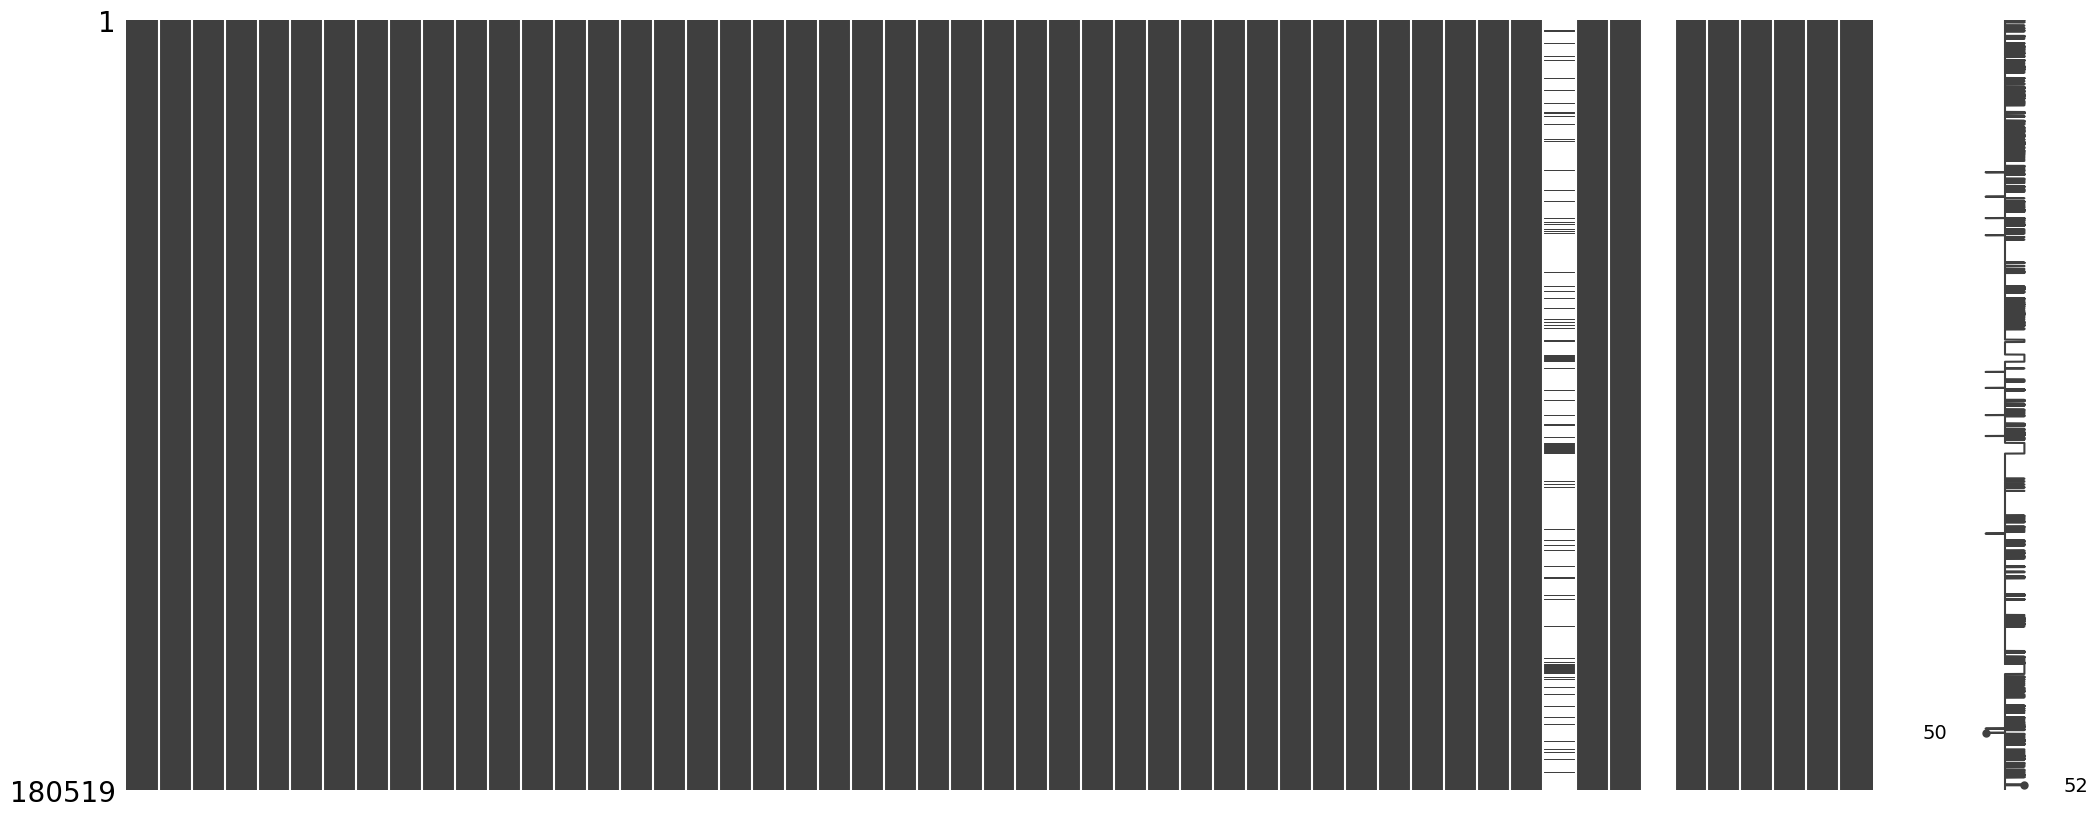

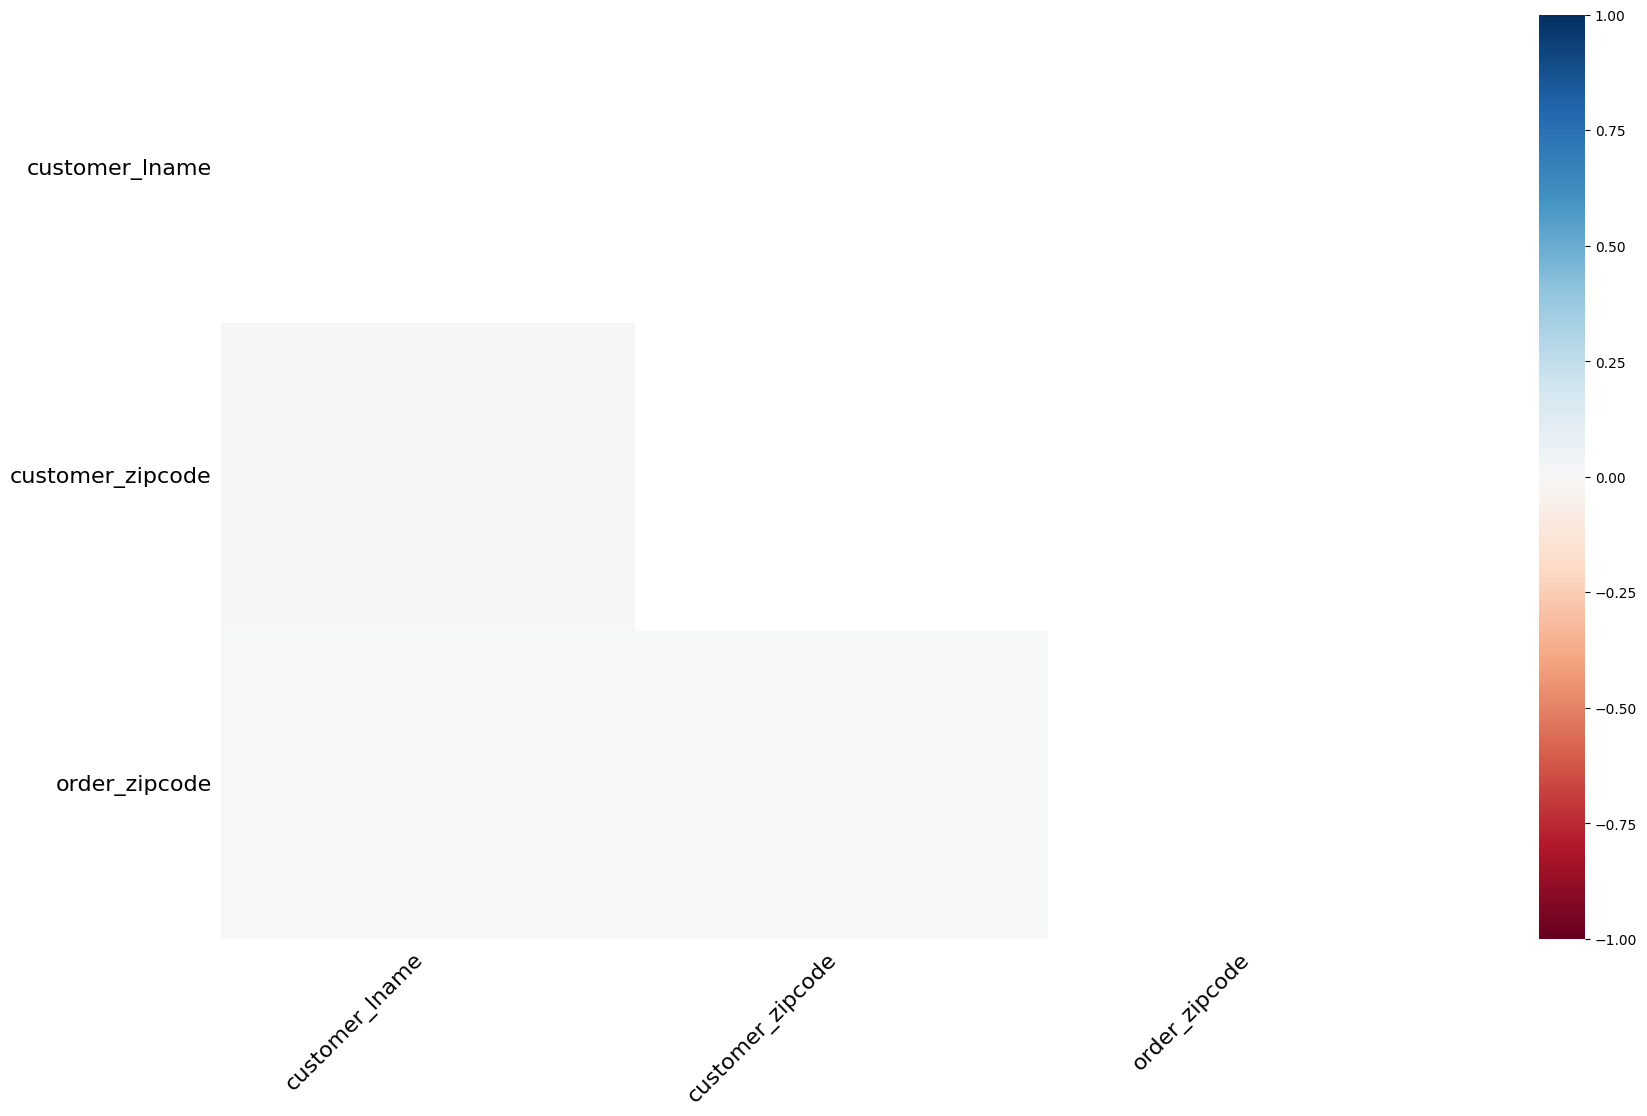

In [10]:
# Visualize missing values
msno.matrix(df)
plt.show()
msno.heatmap(df)
plt.show()

In [11]:
# --- Drop/Fill Missing Values ---
# Drop columns with >90% missing
drop_cols = missing_table[missing_table['missing_pct'] > 90].index.tolist()
df.drop(columns=drop_cols, inplace=True)
print("Dropped columns with >90% missing:", drop_cols)

Dropped columns with >90% missing: ['product_description']


In [12]:
# Drop rows with missing customer_lname/zipcode (tiny %)
df = df.dropna(subset=['customer_lname', 'customer_zipcode'])

In [13]:
# --- Remove Duplicates ---
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count}")
df = df.drop_duplicates()

Duplicate rows: 0


In [14]:
# --- Drop Unnecessary Columns ---
drop_cols2 = [
    'customer_password', 'customer_email','customer_street', 'product_image'
]
df.drop(columns=drop_cols2, inplace=True, errors='ignore')

In [15]:
# --- 5. Distribution Analysis ---
def freq_plot(col, top_n=20, figsize=(7,3)):
    vc = df[col].value_counts().head(top_n)
    plt.figure(figsize=figsize)
    sns.barplot(y=vc.index, x=vc.values)
    plt.title(f'Top {top_n} of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

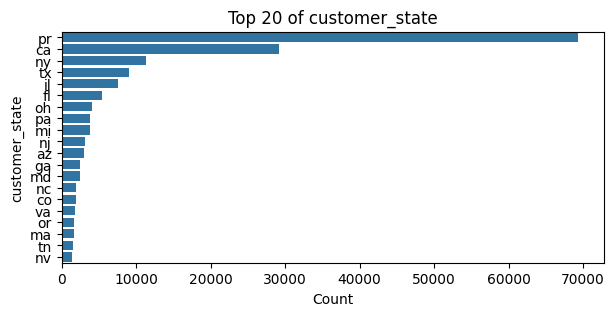

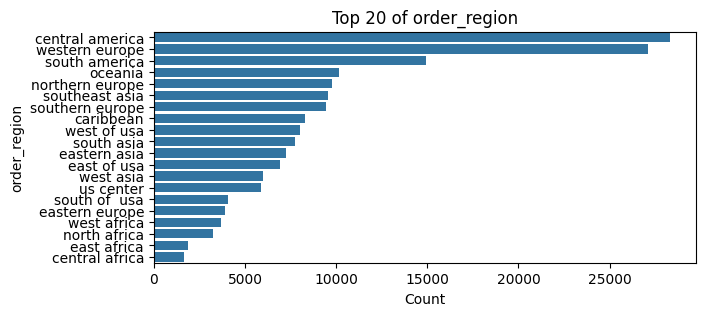

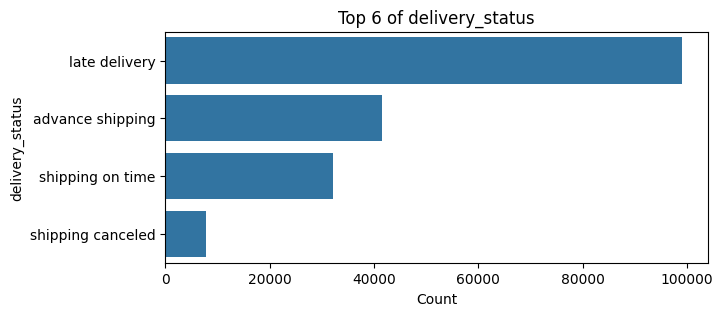

In [ ]:
freq_plot('customer_state')
freq_plot('order_region')
freq_plot('delivery_status', top_n=6)
freq_plot('shipping_mode', top_n=6)
freq_plot('category_name', top_n=10)

In [ ]:
# Distribution by Date time
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_quarter'] = df['order_date'].dt.quarter
df['order_dayofweek'] = df['order_date'].dt.dayofweek
df['order_day_name'] = df['order_date'].dt.day_name()
df['order_hour'] = df['order_date'].dt.hour

In [ ]:
for time_col in ['order_year', 'order_month', 'order_day_name', 'order_hour']:
    freq_plot(time_col, top_n=12)

In [ ]:
# --- 6. Outlier Dectect and Treatment ---
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
# --- Outliner treatment with IQR ---
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    filtered = data[(data[col] >= lower) & (data[col] <= upper)]
    print(f"{col}: {len(data) - len(filtered)} outlier removed")
    return filtered

In [ ]:
for col in ['benefit_per_order', 'sales_per_customer', 'order_item_product_price', 'order_item_quantity', 'sales']:
    df = remove_outliers_iqr(df, col)

In [ ]:
# --- 7. Correlation Analysis ---
corr_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [ ]:
# Scatter plot btw sales and benefit_per_order
plt.figure(figsize=(8, 3))
sns.scatterplot(x=df['sales'], y=df['benefit_per_order'])
plt.title('Sales vs Benefit Per Order')
plt.xlabel('Sales')
plt.ylabel('Benefit Per Order')
plt.show()

In [ ]:
# --- 8. Save Clean Data ---
df.to_csv('/workspaces/adorie-data-projects/scm-co-smart-project/data/clean/cleaned_DataCoSupplyChainDataset.csv', index=False)
print("Saved cleaned data.")